In [111]:
import numpy as np
import pandas as pd
data = pd.read_csv('adult21.csv') 
att = ['LSATIS11R_A','SEX_A','REGION','WEIGHTLBTC_A','DEPFREQ_A','ANXFREQ_A','SAD_A','PAIFRQ3M_A','REPSTRAIN_A','PHSTAT_A', 'EDUCP_A','CANEV_A', 'AGEP_A']
data_pp = data[att]

# Remove columns where 'SEX_A' isn't a 1 or 2
data_drop = data[(data['SEX_A'] == 7) | (data['SEX_A'] == 9)].index
data_pp = data_pp.drop(data_drop, inplace = False)




In [112]:
data_pp_male = data_pp[data_pp['SEX_A'] == 1].drop(columns='SEX_A')
data_pp_female = data_pp[data_pp['SEX_A'] == 2].drop(columns = 'SEX_A')
male_corr = data_pp_male.corr()
female_corr = data_pp_female.corr()


In [113]:
from label_parsing import label_parser
lb = label_parser()
desc_att = {}
for i in att:
    desc_att[i] = lb.find_var_label(i)
male_corr= male_corr.rename(index=desc_att)
female_corr = female_corr.rename(index=desc_att)

<AxesSubplot: >

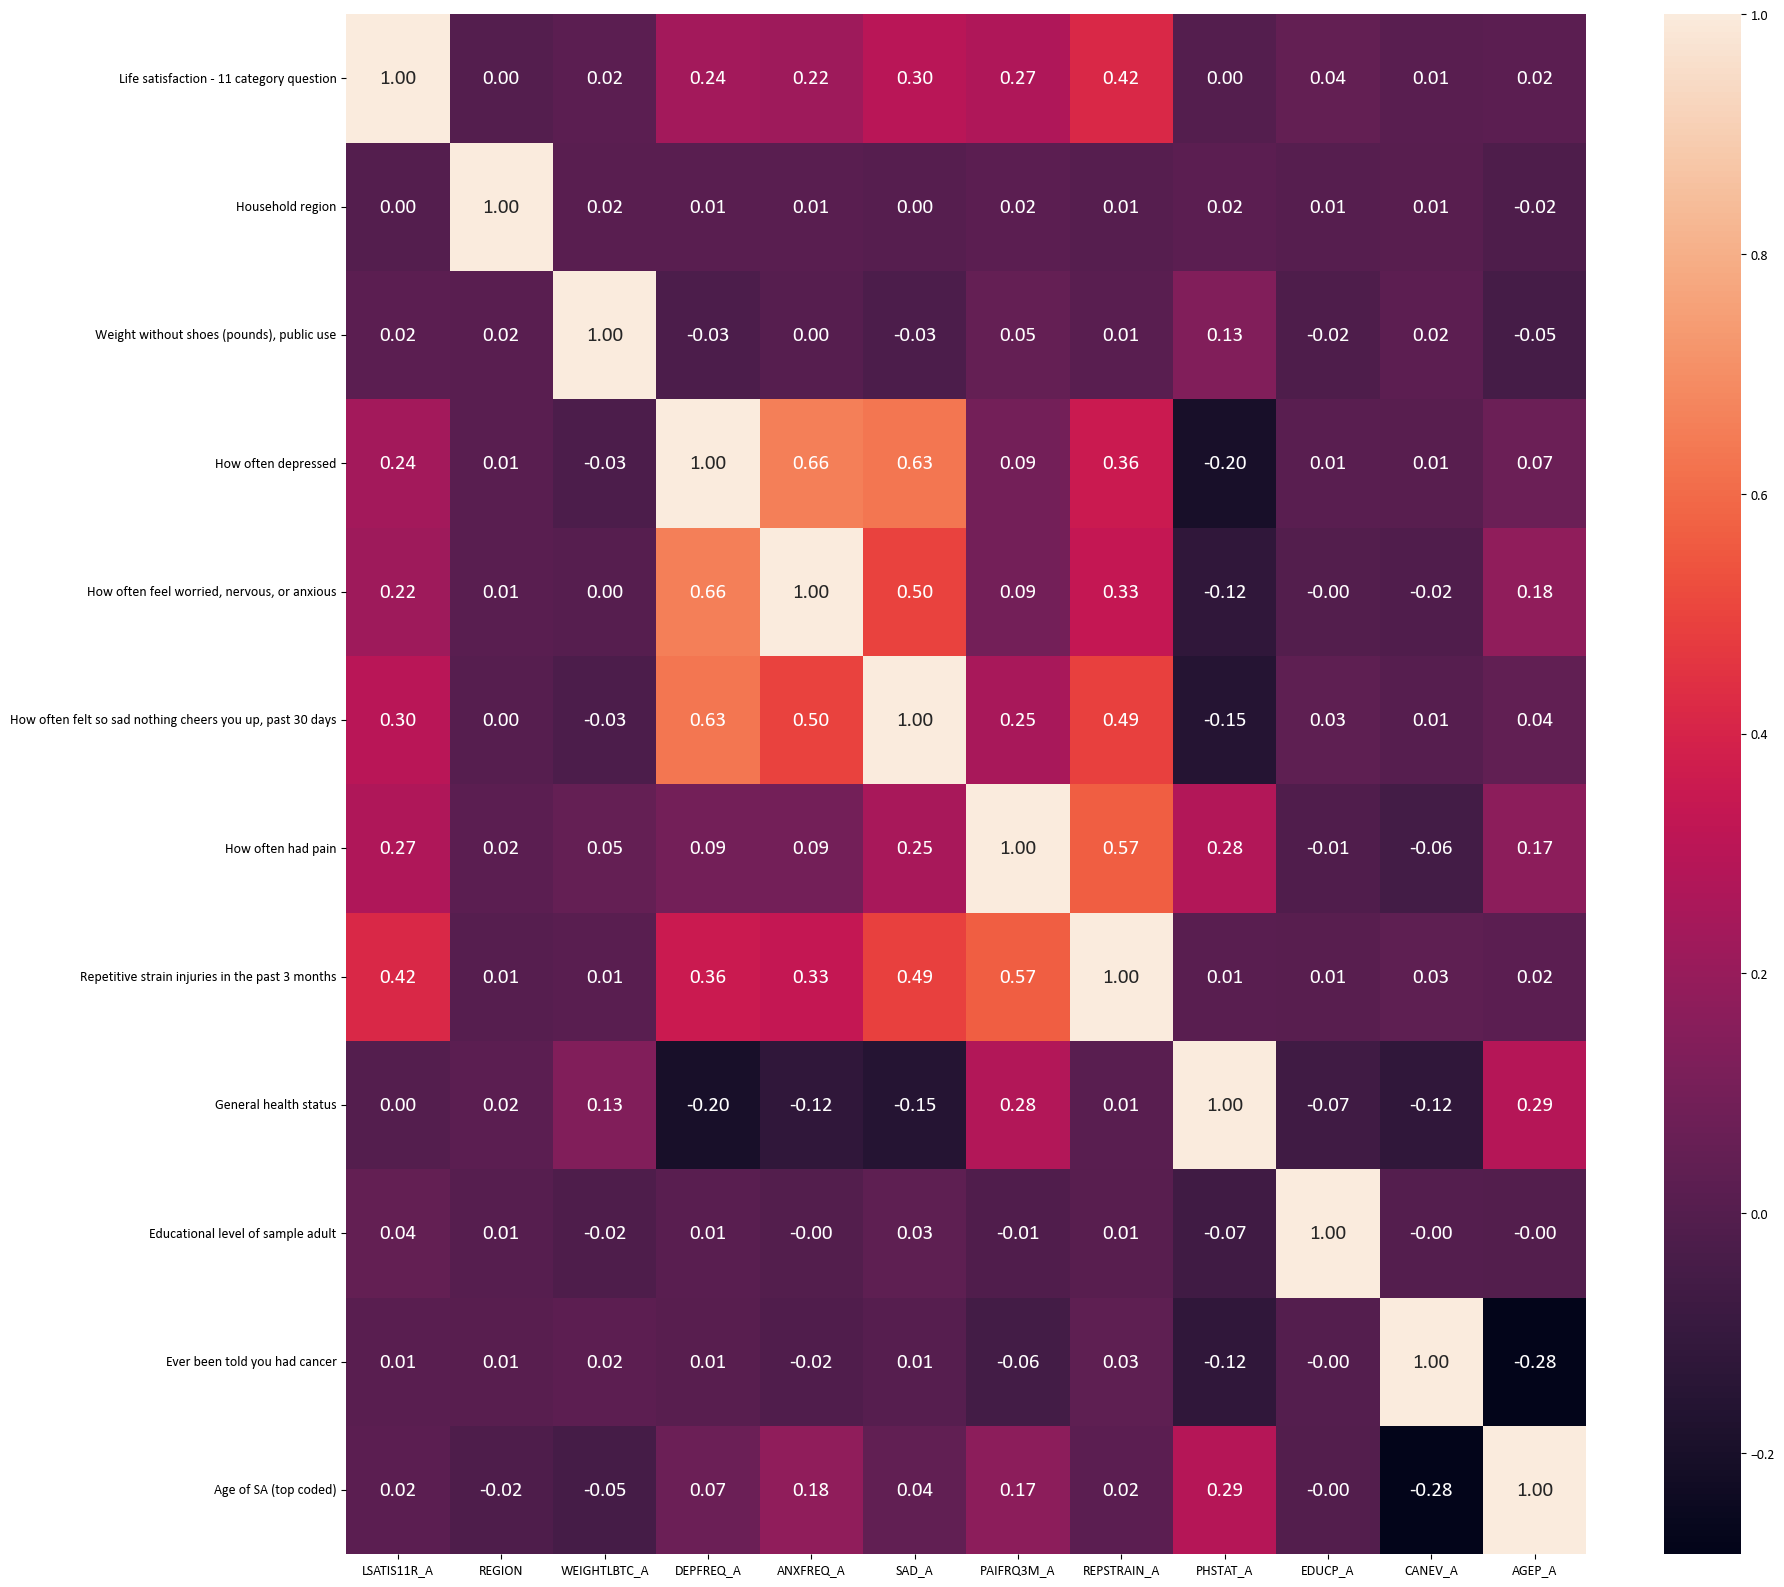

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.set_style({'font.family': 'Calibri'})
sns.heatmap(male_corr, annot=True, fmt='.2f',annot_kws={"fontsize":15})


<AxesSubplot: >

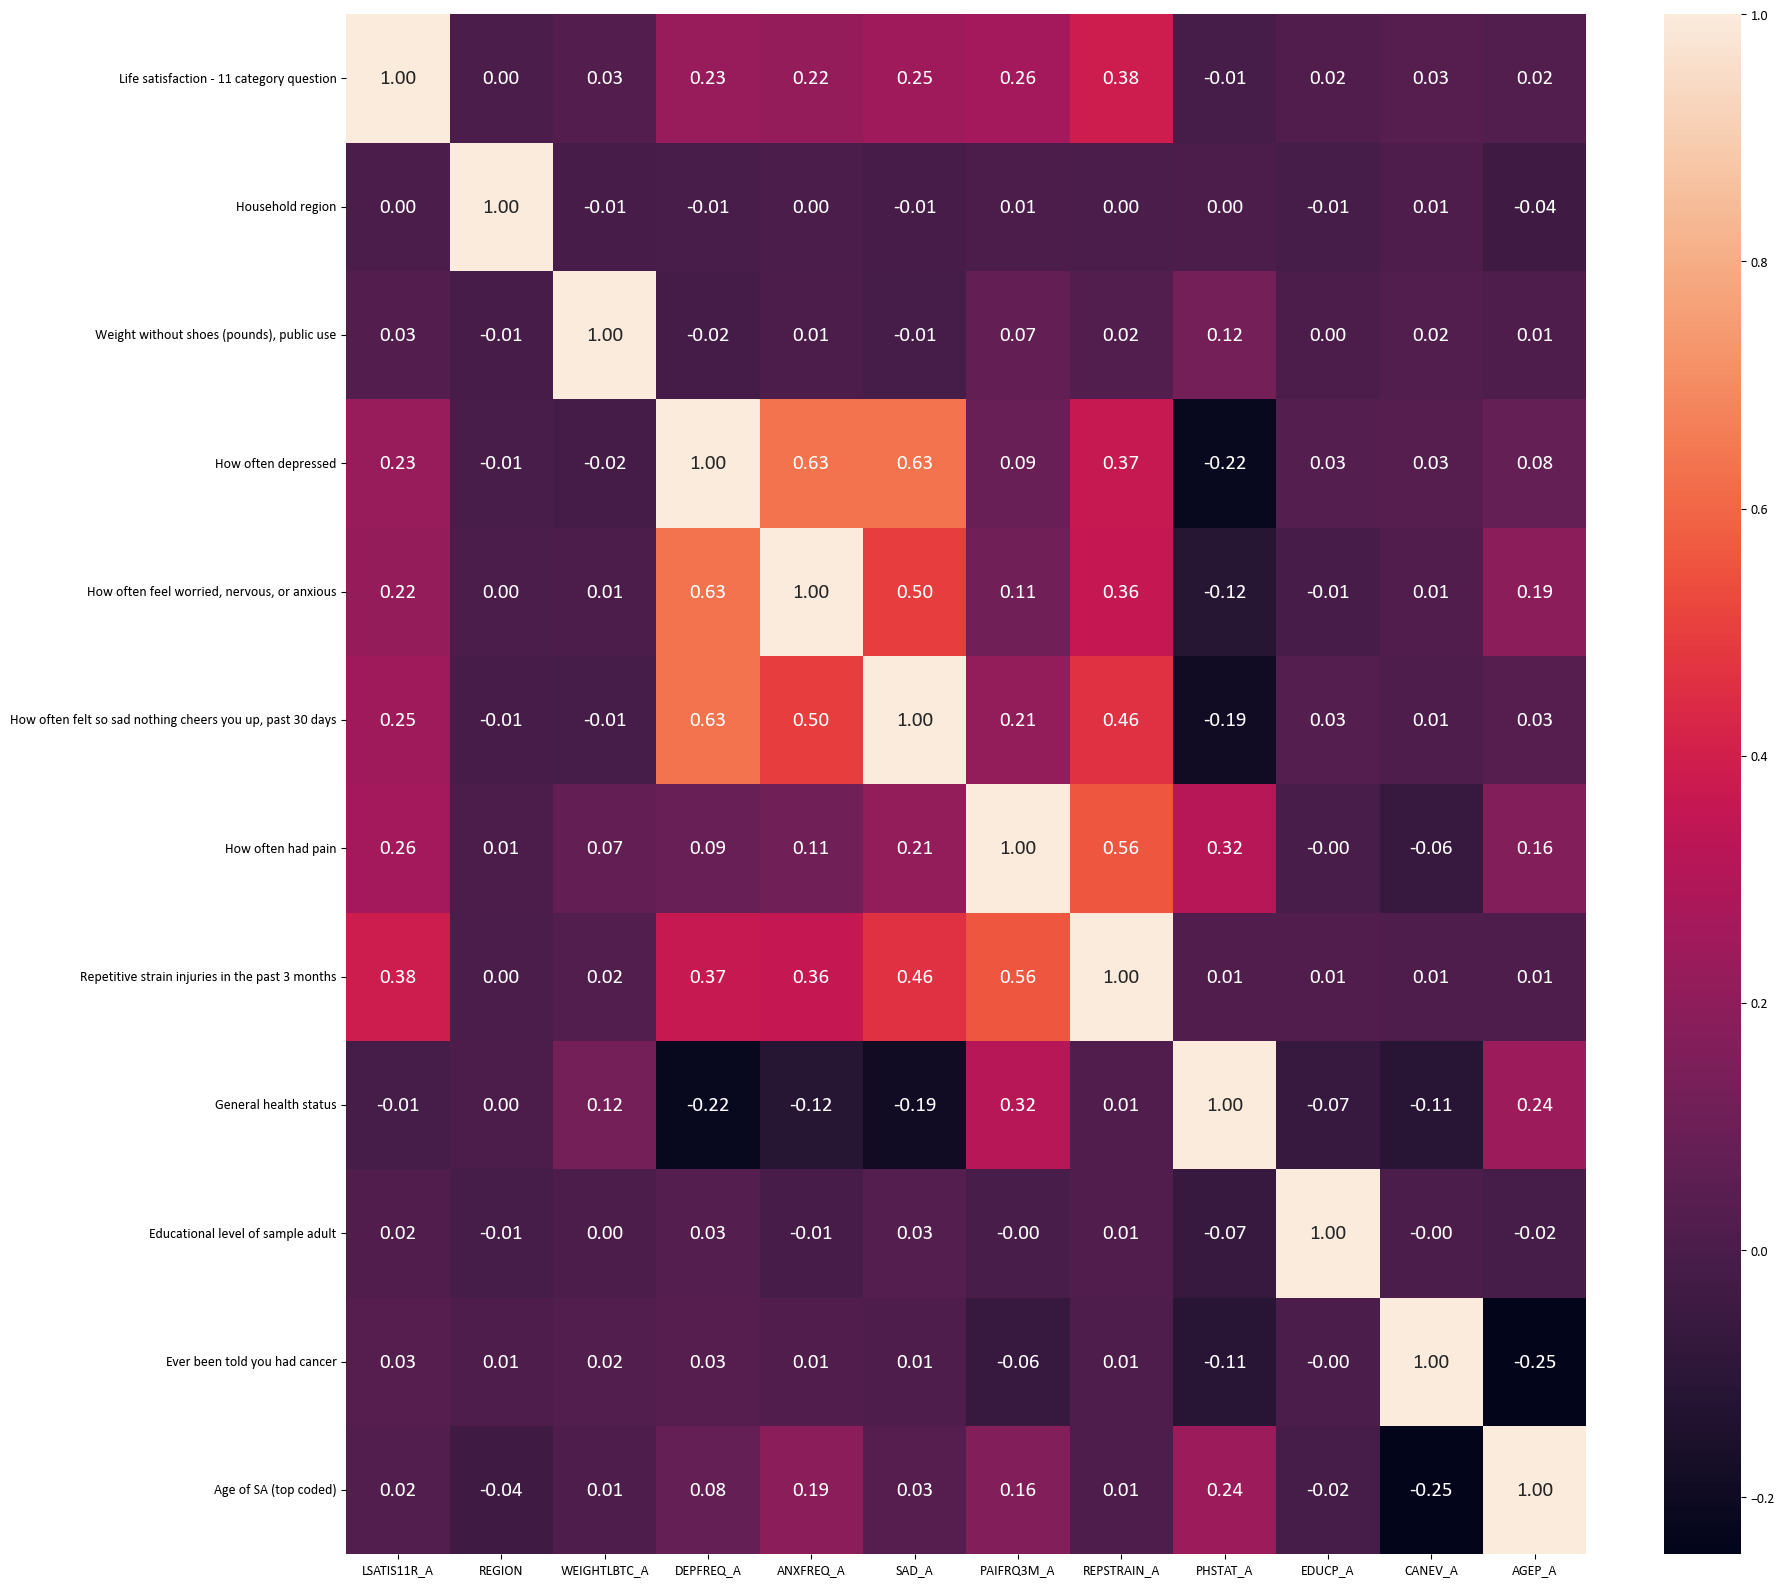

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sns.set_style({'font.family': 'Calibri'})
sns.heatmap(female_corr, annot=True, fmt='.2f',annot_kws={"fontsize":15})


Text(0.5, 1.0, 'Correlation Matrix')

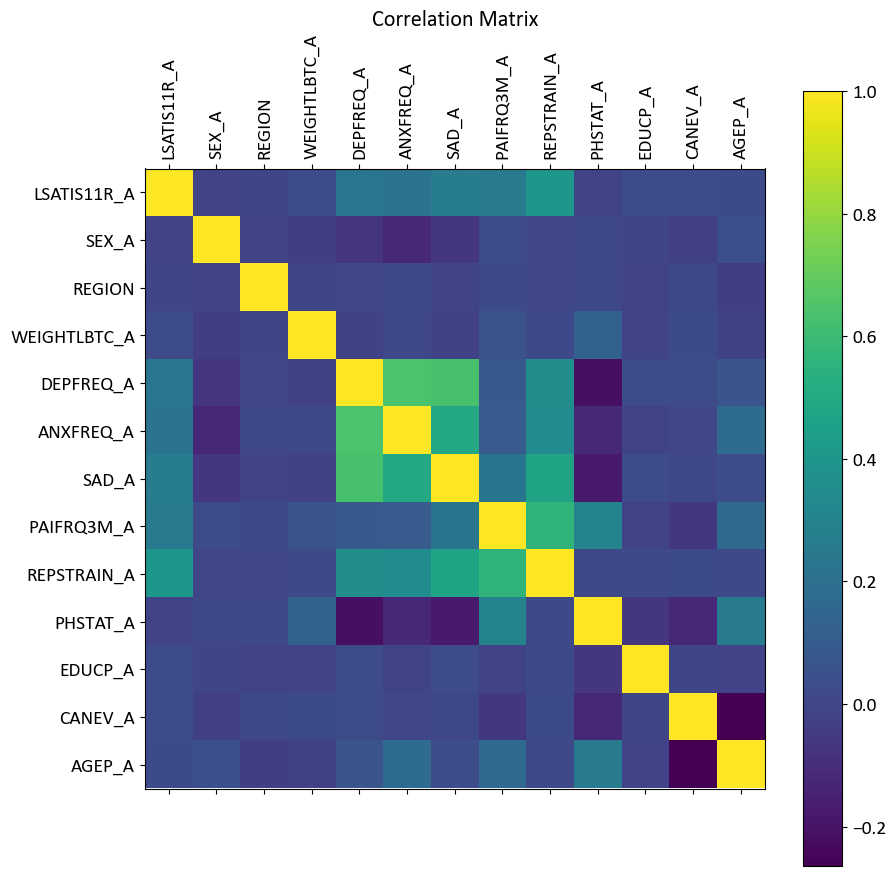

In [116]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 10))
plt.matshow(data_pp.corr(), fignum=f.number)
plt.xticks(range(data_pp.select_dtypes(['number']).shape[1]), data_pp.select_dtypes(['number']).columns, fontsize=14, rotation = 90)
plt.yticks(range(data_pp.select_dtypes(['number']).shape[1]), data_pp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)